# Double Pendulum Project

Name: Michael Blanchard and Reilly Kobbe
 
Class: PHY-2200
 
Professor: Dr. Titus

Description: The goal for the project was to use multiple differential equations and an RK4 ODE method to model a double pendulum. We wanted to investigate the motion of a double pendulum and see how changing parameters would effect the model. 



In [1]:
import ode
import numpy as np
import matplotlib.pyplot as plt 
import random as rand
from vpython import *

<IPython.core.display.Javascript object>

# Double Pendulum Code

In this section of code we solved for the differential equations. To do this we had to take into account specific values such as the mass of the balls, the length of the rods, and gravity. These values are important becuase they will effect how the double pendulum moves.

Next, we defined theta and omega. We had to define their derivatives to account for the second pendulum. These differential equations are significant because they act as our dependent variables. Since time is our independent variable, it will effect the value of domega and dtheta. From here we used deriv, which stored the instantaneous values of theta, omega, and their derivatives. 
 
Overall, the use of differential equations may be difficult to understand, however, the biggest takeaway is that these equations have a huge impact on the movement of the pendullum. In addition, fluctuating the values of the constants will have an effect on the result of these equations and how the pendulum moves. 

In [2]:
#independent variablesg = 10 #N/kg
R = 1  #m
m1 = .2 #mass of penn 1 was .1
m2 = .2 #mass of penn 2 was .1
L1 = .7  #was .8
L2 = .7
g = 10

In [3]:
def pendulum(dep, t):  
    theta = dep[0]
    omega = dep[1]
    theta2 = dep[2]
    omega2 = dep[3] 
    
    #dtheta / dt
    dtheta = omega
    #domega/ dt
    domega = (-g*(2*m1+m2)*np.sin(theta) - m2*g*np.sin(theta-2*theta2) - 2*np.sin(theta-theta2)*m2*((omega2**2)*L2 + (omega2**2)*L1*np.cos(theta-theta2))) / (L1*((2*m1+m2)-(m2*cos(2*np.cos(2*theta-2*theta2))))) #domega/dt
    
    #dtheta2 / dt
    dtheta2 = omega2
    #domega2 / dt
    domega2 = (2*np.sin(theta-theta2) * (omega*L1*(m1+m2) + g*(m1+m2)*np.cos(theta) + (omega2**2)*L2*m2*np.cos(theta-theta2))) / (L2*((2*m1+m2)-(m2*np.cos(2*np.cos(2*theta-2*theta2))))) #equation for theta2 
    
    #array of dependent variables
    deriv = np.array([dtheta, domega, dtheta2, domega2])
    
    #This returns the value of the diff eq (i.e second deriv of theta 1 theta2)
    return deriv

# The Implementation

Moving on from the pendulum function, we implement the previously defined equations and make use of the RK4 method.

We start by initializing the dependent variables and storing them into another array. These variables will be parameters when RK4 is used. 

The important piece of this section of code is when RK4 is implemented. The RK4 method will take the values of the dependent variables at t and calculate the next timestep, t+h. This method is extreamly important becuase without it the positions of the pendulum would never be updated. This is why it is stored in a loop, so it will run at each timestep. Although there are other ODE methods, we found RK4 to be the most accurate. 

In [4]:
#initial dependent variables
theta = np.pi/2
omega = 0
theta2 = np.pi/2
omega2 = 0

data = np.array([theta, omega, theta2, omega2]) #initialize array to store dependent variables

#independent variable
t = 0
h = 0.01
Nsteps = int(10/h) #N steps for T seconds of evolution

#create arrays needed for plotting theta vs. t and omega vs. t
tarr = np.zeros(Nsteps)
thetaarr = np.zeros(Nsteps)
omegaarr = np.zeros(Nsteps)
theta2arr = np.zeros(Nsteps)
omega2arr = np.zeros(Nsteps)

tarr[0] = t
thetaarr[0] = theta
omegaarr[0] = omega
theta2arr[0] = theta2
omega2arr[0] = omega2

#create a time evolution loop
for n in range(1,Nsteps):
    
    data = ode.RK4(pendulum, data, t, h) #update [theta, omega]
    
    t = t + h #update values
    
    #store values in arrays
    tarr[n] = t
    
    #for the total energy
    y = -R*np.cos(data[0])
    v = R*np.cos(data[1])
    
    thetaarr[n] = data[0] #store theta
    omegaarr[n] = data[1] #store omega
    theta2arr[n] = data[2] #store theta2
    omega2arr[n] = data[3] #store omega2



# Graphing our Results

After properly making our calculations, it came time to graph our data. We created two graphs; one was both theta1 and theta2 graphed vs. time and the second was theta1 and theta2 graphed against eachother. For each graph our theta, omega, and time arrays were used extensively. Without this information, we would not be able to properly plot our data.
 
# **Theta vs Time** 
 
This graph does a nice job depicting how both pendulum angles are acting while in motion. There is no point where the graph takes off into infinity, which can be a common error in plotting a pendulum graph. We deem the graph to be acurate becuase you can see both pendulums lines move with one another (roughly the same shape). 
 
# **Theta 1 vs Theta 2**
 
This graph acuratley depicts how both pendulum angles work against one another. Again, we noticed nothing looked totally abnormal (i.e nothing was shooting to infinity or -infinity), so we deemed the second graph to be acurate as well.

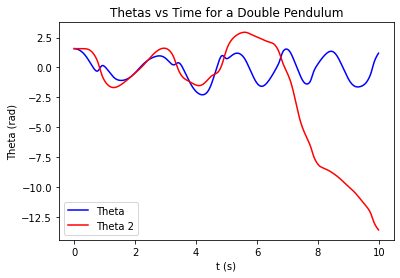

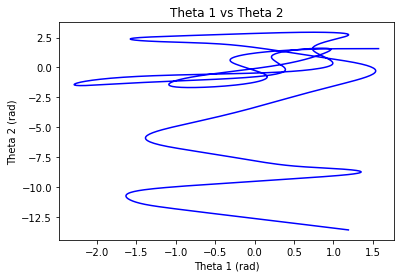

In [5]:
#Graph of Theta1 and Theta2 vs time
plt.figure()
plt.title("Thetas vs Time for a Double Pendulum")
plt.plot(tarr, thetaarr, 'b-', label='Theta')
plt.plot(tarr, theta2arr, 'r-', label='Theta 2')
plt.xlabel("t (s)")
plt.ylabel("Theta (rad)")
plt.legend()
plt.show()

plt.figure()
plt.title("Theta 1 vs Theta 2")
plt.xlabel("Theta 1 (rad)")
plt.ylabel("Theta 2 (rad)")
plt.plot(thetaarr, theta2arr, 'b-')
plt.show()

# Our Moving Pendulum 
 
Printing the model of the working double pendulum drew many challenges to overcome. First we declared X1, Y1, X2, and Y2 values which allowed us to set coordinates for the balls and rods. By setting the ball and rod positions to these coordinates, we were able to ensure both rods were touching. Lastly, we used a for loop which iterated through the time array. By doing so, we were able to set the X and Y values to the different elements inside our theta array; this allowed our pendulums to swing in the correct manner.
 
# Discoveries

Something that we discovered is that the longer the rod is, the less momentum the pendulums have. In our case, we left the mass at .1 and changed the rod size to 1. We noticed that neither pendulum rotated a full 360 degrees like they usually do. 

Next we decided to increase the mass to .5 and leave the rods at .6 in length. We noticed that since the balls were heavier, it took longer for the momentum to increase. However, the gravitational pull on the heavier mass allowed for the momentum to become more instense over time.

Overall, the model of a double pendulum is very interesting. There is a lot to discover by changing the constants of the model. Its uniqueness made this a very fun project!

In [ ]:
# create the ceiling, masses, and strings
scene = canvas()

#declare the starting x and y positions
x1 = L1 * np.sin(thetaarr[0])
y1 = -L1 * np.cos(thetaarr[0])
x2 = x1 + L2*sin(theta2arr[0])
y2 = y1 + y1-L2*cos(theta2arr[0])
    

#Ball 1
ball1 = sphere(pos=vector(x1,y1,0), radius=0.05, color=color.green , make_trail=True, retain=50) 
ball1.color=color.green

#Ball 2
ball2 = sphere(pos=vector(x2, y2,0), radius=0.05, color=color.cyan, make_trail=True, retain=50) 
ball2.color=color.cyan

#rods
rod1 = cylinder(pos=vec(0,0,0),axis=ball1.pos, color=color.white, radius=0.008)
rod2 = cylinder(pos=ball1.pos, axis=ball2.pos-ball1.pos, color=color.white, radius=0.008)

scene.pause()

for n in range(len(tarr)):
    rate(100)
    
    #store the angles in the array
    theta = thetaarr[n]
    theta2 = theta2arr[n]
    
    #update positions of x and y variables
    x1 = L1 * np.sin(theta)
    y1 = -L1 * np.cos(theta)
    x2 = x1 + L2*sin(theta2)
    y2 = y1 + y1-L2*cos(theta2)
    
    #update the rod and ball positions
    ball1.pos = vec(x1,y1,0)
    ball2.pos = vec(x2,y2,0)
    rod1.axis = ball1.pos
    rod2.pos = ball1.pos
    rod2.axis = ball2.pos-ball1.pos



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>